In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
testing_df = df.copy()
testing_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
testing_cleaned_df = testing_df.drop(columns=['BMI','PhysicalHealth','MentalHealth','Sex','AgeCategory','Race',
                                              'GenHealth','SleepTime'])
testing_cleaned_df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes
1,No,No,No,Yes,No,No,Yes,No,No,No
2,No,Yes,No,No,No,Yes,Yes,Yes,No,No
3,No,No,No,No,No,No,No,No,No,Yes
4,No,No,No,No,Yes,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No
319791,No,Yes,No,No,No,No,Yes,Yes,No,No
319792,No,No,No,No,No,No,Yes,No,No,No
319793,No,No,No,No,No,No,No,No,No,No


In [5]:
filtered_df = pd.get_dummies(testing_cleaned_df,dtype=float)
filtered_df.head(10)

,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
7,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
filtered_df = filtered_df.drop(columns=['HeartDisease_No','Smoking_No','AlcoholDrinking_No','Diabetic_No','Stroke_No',
                                       'DiffWalking_No','PhysicalActivity_No','Diabetic_Yes (during pregnancy)','Asthma_No',
                                       'KidneyDisease_No','SkinCancer_No','Diabetic_No, borderline diabetes'])
filtered_df

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
319790,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
319791,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
319792,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X = filtered_df.copy()
X.drop(columns={'HeartDisease_Yes'},axis=1, inplace=True)
X.head()

,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [8]:
y = filtered_df['HeartDisease_Yes'].ravel()
y[:5]

array([0., 0., 0., 0., 0.])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
smt = SMOTE()

In [11]:
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [12]:
scaler = StandardScaler()

In [13]:
X_scaler = scaler.fit(X_train_sm)

In [14]:
X_train_scaled = X_scaler.transform(X_train_sm)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=1567)

In [16]:
rf_model = rf_model.fit(X_train_scaled, y_train_sm)

In [17]:
predictions = rf_model.predict(X_test_scaled)

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,55486,17666
Actual 1,2406,4391


Accuracy Score : 0.7489399492176262
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85     73152
         1.0       0.20      0.65      0.30      6797

    accuracy                           0.75     79949
   macro avg       0.58      0.70      0.58     79949
weighted avg       0.89      0.75      0.80     79949



In [20]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2903798172172637, 'DiffWalking_Yes'),
 (0.22855160502584812, 'Diabetic_Yes'),
 (0.17120598107099128, 'Stroke_Yes'),
 (0.11106450522717978, 'Smoking_Yes'),
 (0.07860883811462906, 'SkinCancer_Yes'),
 (0.0727815833973273, 'KidneyDisease_Yes'),
 (0.02578243135863038, 'PhysicalActivity_Yes'),
 (0.015821806438600133, 'AlcoholDrinking_Yes'),
 (0.005803432149530324, 'Asthma_Yes')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

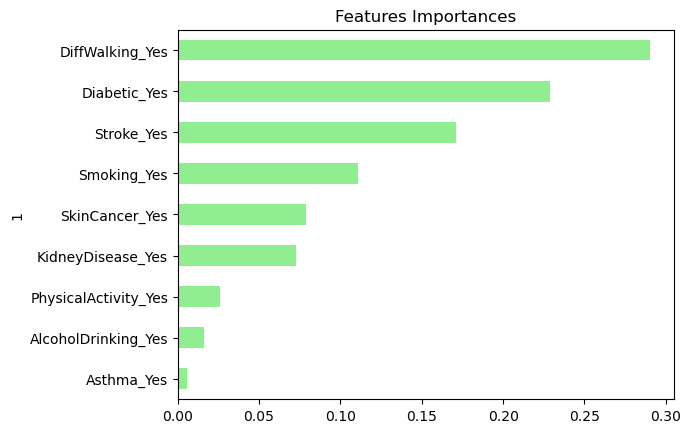

In [21]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)